In [1]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# file upload from local drive
uploaded = files.upload()

Saving credit_risk_dataset.csv to credit_risk_dataset.csv


In [3]:
# reading the csv as dataframe
data = pd.read_csv('credit_risk_dataset.csv')

In [4]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
data.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
data.shape

(32581, 12)

In [8]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [9]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [10]:
data.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64


## Dataset Preprocessing

In [11]:
# check missing values
missing_rows = data.isnull().any(axis=1)
print("Rows with missing values:")
#print(data[missing_rows]) # display column and row
print(missing_rows[missing_rows == True])  # displays the row indices

Rows with missing values:
39       True
50       True
57       True
59       True
62       True
         ... 
32547    True
32552    True
32553    True
32569    True
32570    True
Length: 3943, dtype: bool


In [12]:
# get duplicate rows
duplicate_rows = data[data.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
       person_age  person_income person_home_ownership  person_emp_length  \
15975          23          42000                  RENT                5.0   
15989          23          90000              MORTGAGE                7.0   
15995          24          48000              MORTGAGE                4.0   
16025          24          10000                  RENT                8.0   
16028          23         100000              MORTGAGE                7.0   
...           ...            ...                   ...                ...   
32010          42          39996              MORTGAGE                2.0   
32047          36         250000                  RENT                2.0   
32172          49         120000              MORTGAGE               12.0   
32259          39          40000                   OWN                4.0   
32279          43          11340                  RENT                4.0   

             loan_intent loan_grade  loan_amnt  loan_int_ra

In [13]:
# remove missing values
data.dropna(axis=0, inplace=True)

In [14]:
# remove duplicate values
data.drop_duplicates(inplace=True)

In [15]:
# create new dataframe to house correlation
corr_df = data[["loan_percent_income", "loan_status"]]

In [16]:
# calculate the correlation coefficients
corr = corr_df["loan_percent_income"].corr(corr_df["loan_status"])
print(f"Correlation between debt to income ratio and default rate: {corr}")

Correlation between debt to income ratio and default rate: 0.38000025291817946


### Box plot to show debt to income ratio vs default rate

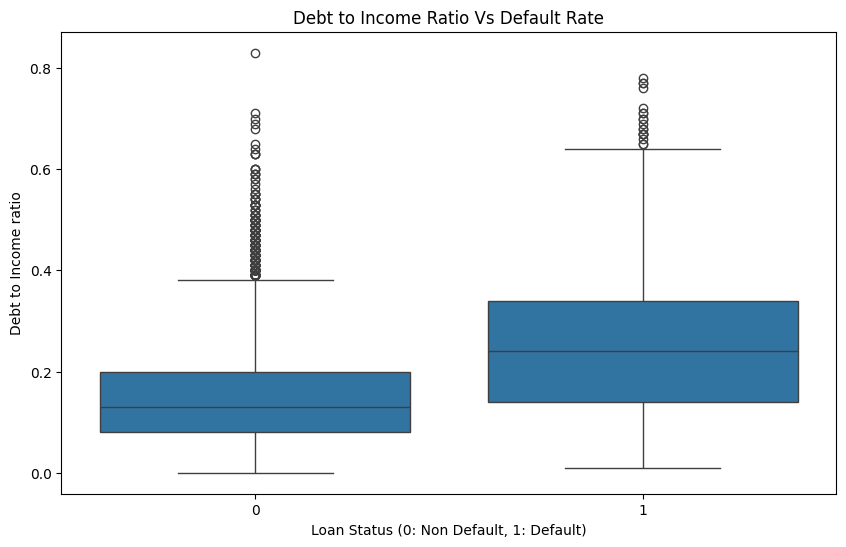

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="loan_status", y="loan_percent_income", data=data)
plt.title("Debt to Income Ratio Vs Default Rate")
plt.xlabel("Loan Status (0: Non Default, 1: Default)")
plt.ylabel("Debt to Income ratio")
plt.show()

### Inference from box plot of debt-to-income ratio vs default rate
- A higher debt-to-income ratio seems to indicate a higher loan default ratio
- The correlation is also positive between the two variables
- Therefore we can conclude that individuals with higher debt-to-income ratio will have higher default ratio.

## Understanding realtionship between **loan intent**, **loan amount** and **default rate**
- The idea is to indetify loans with the highest default rate
- Our goal is to analyze only **default** cases

Loan Intent Ranking by Count of Defaults:
############################################
         Loan Intent  Count of Defaults  Avg Loan Amnt
3            MEDICAL               1418   11373.748237
0  DEBTCONSOLIDATION               1294   11316.750386
1          EDUCATION                967   11160.082730
4           PERSONAL                961   10708.896982
2    HOMEIMPROVEMENT                820    9966.067073
5            VENTURE                728   11304.910714

Ranking of Loan Intent by Avg Loan Amnt: 
############################################
         Loan Intent  Count of Defaults  Avg Loan Amnt
3            MEDICAL               1418   11373.748237
0  DEBTCONSOLIDATION               1294   11316.750386
5            VENTURE                728   11304.910714
1          EDUCATION                967   11160.082730
4           PERSONAL                961   10708.896982
2    HOMEIMPROVEMENT                820    9966.067073


<ipython-input-18-131b05e429dc>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count of Defaults", y="Loan Intent", data=loan_intent_default_sumry, palette="viridis", ax=ax1)


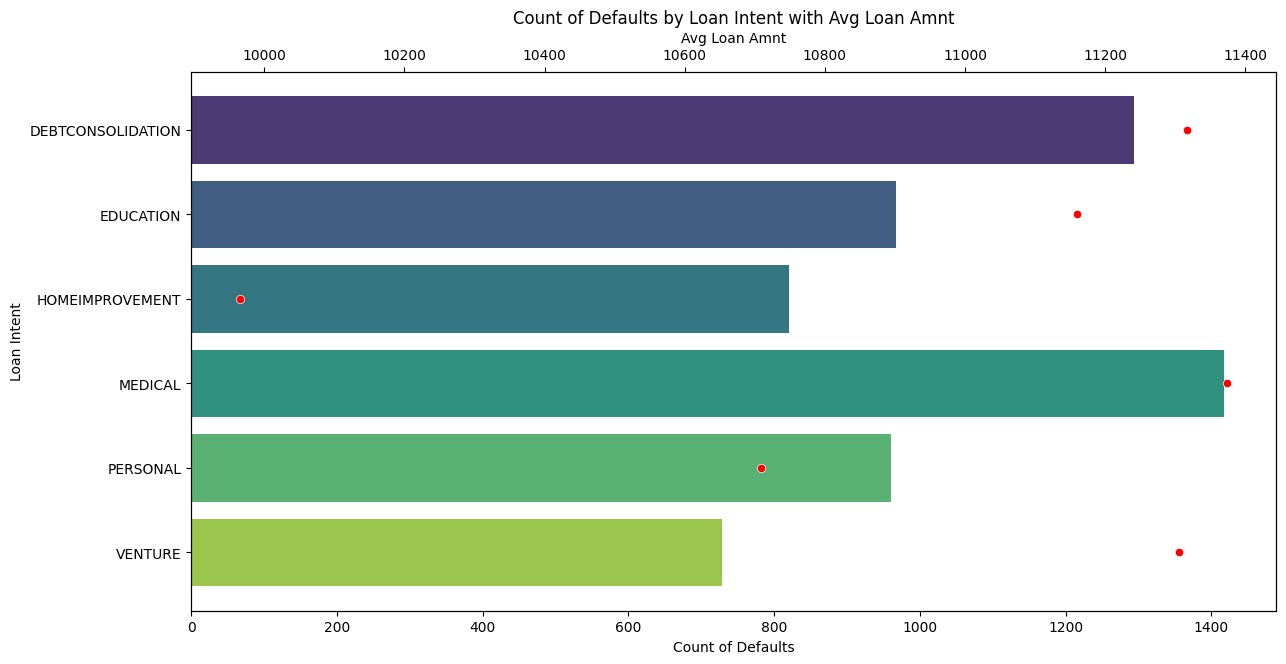

In [18]:
default_df = data[data["loan_status"] == 1]

# DF: calculating number of default cases as per loan intent category
loan_intent_category_count = default_df.groupby("loan_intent")["loan_status"].count().reset_index()

# renaming columns
loan_intent_category_count.columns = ["Loan Intent", "Count of Defaults"]

# DF: average loan amount for each category of loan intent
loan_intent_avg_loan = default_df.groupby("loan_intent")["loan_amnt"].mean().reset_index()

# renaming columns
loan_intent_avg_loan.columns = ["Loan Intent", "Avg Loan Amnt"]

# Merging the two newly create dataframes
loan_intent_default_sumry = pd.merge(loan_intent_category_count, loan_intent_avg_loan, on = "Loan Intent")

# Sorting the values by default count
loan_intent_default_sumry.sort_values(by="Count of Defaults", ascending=False)

# Printing the data
count_of_default = loan_intent_default_sumry.sort_values(by="Count of Defaults", ascending=False)

print("Loan Intent Ranking by Count of Defaults:")
print("############################################")
print(count_of_default)

# Printing Avg loan amnt
avg_loan_amnt = loan_intent_default_sumry.sort_values(by="Avg Loan Amnt", ascending=False)
print("\nRanking of Loan Intent by Avg Loan Amnt: ")
print("############################################")
print(avg_loan_amnt)


################################
# Plotting the data
#################################
# Plot 1
fig, ax1 = plt.subplots(figsize=(14, 7))
sns.barplot(x="Count of Defaults", y="Loan Intent", data=loan_intent_default_sumry, palette="viridis", ax=ax1)
ax1.set_title("Count of Defaults by Loan Intent with Avg Loan Amnt")
ax1.set_xlabel("Count of Defaults")
ax1.set_ylabel("Loan Intent")

# Plot 2
ax2 = ax1.twiny()
sns.scatterplot(x="Avg Loan Amnt",y="Loan Intent", data=loan_intent_default_sumry, color="red", ax=ax2 )
ax2.set_xlabel("Avg Loan Amnt")

plt.show()


### Inference of Loan Intent relation to Count of Defaults with Average Loan amount in each Loan Intent category

- Medical Loan category seems to incur the highest number of loan defaults. <font color="green">**[Count of Medical Loans = 1418]**</font>

- Debt consolidation is closely followed by medical loan intent with second highest cases of defaults.

- The lowest loan defaults take place in Venture category of loan intent. <font color="green">**[Count of Venture Loans = 728]**</font>

- While both Education, Home Improvement and Personal categories are close to each other

- The higest average loan amount is that of Medical loans. <font color="green">**[Average Medical Loan Amount = $11373.75]**</font>

- The lowest average loan amount is in the Home Improvement category. <font color="green">**[Average Medical Loan Amount = $9966.07]**</font>

# Building Credit Risk Assesment Model With Logistic Regression

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score

In [20]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [21]:
# The target variable is loan_status

X = data[["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate",
         "person_home_ownership", "loan_intent", "cb_person_default_on_file"]]

y = data["loan_status"]

X.drop(columns=["loan_amnt"], inplace=True)

numeric_features = ["person_age", "person_income", "person_emp_length",
                    "loan_int_rate"]

categorical_features = ["person_home_ownership", "loan_intent", "cb_person_default_on_file"]

# Pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the numerical and categorical preprocessing steps
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Fit preprocessor and transform the data

X_processed = preprocessor.fit_transform(X)
categorical_columns = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)

# Combine the numeric and categorical columns
all_columns = numeric_features + list(categorical_columns)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Model Algorithm
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)
y_pred = logistic_classifier.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

categories = {
    "person_home_ownership": ['RENT','OWN', 'MORTGAGE', 'OTHER'],
    "loan_intent": ['PERSONAL','EDUCATION','MEDICAL','VENTURE','HOMEIMPROVEMENT','DEBTCONSOLIDATION'],
    "cb_person_default_on_file": ['Y', 'N']

}


# Function to get user input
def predict_loan_default():
  print("\nEnter applicant details for credit risk assessment:")
  age = float(input("Applicant's age: "))
  income = float(input("Applicant's income: "))
  emp_length = float(input("Applicant's employment length (in years):"))
  loan_int_rate = float(input("Loan interst rate:"))
  loan_amnt = float(input("Loan amount requested:"))
  loan_percent_income = loan_amnt/income
  home_ownership = input("Home ownersip (RENT/MORTGAGE/OWN/OTHER):").upper()
  loan_intent = input("Loan intent (DEBTCONSOLIDATION/EDUCATION/HOMEIMPROVEMENT/MEDICAL/PERSONAL/VENTURE)").upper()

  default_history = input("Has the applicant deafaulted before (Y/N):").upper()

  input_data = {
      "person_age": [age],
      "person_income": [income],
      "person_emp_length": [emp_length],
      "loan_int_rate": [loan_int_rate]
  }

  for category, value in zip(["person_home_ownership", "loan_intent", "cb_person_default_on_file"], [home_ownership, loan_intent, default_history]):
    for val in categories[category]:
      input_data[f"{category}_{val}"] = [1 if value == val else 0]

  input_data = pd.DataFrame(input_data)

  for col in all_columns:
    if col not in input_data.columns:
      input_data[col] = 0
  input_data = input_data[all_columns]

  prediction = logistic_classifier.predict(input_data)[0]

  if prediction == 1:
    print("\nBased on the information provided, the applicant is predicted to be more likely to default on the loan")
  else:
    print("\nBased on the information provided, the applicant is predicted to be less likely to default on the loan")

predict_loan_default()

<ipython-input-21-7f0f1a45433c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=["loan_amnt"], inplace=True)


Accuracy:  0.8193299421154183

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4441
           1       0.68      0.34      0.46      1260

    accuracy                           0.82      5701
   macro avg       0.76      0.65      0.67      5701
weighted avg       0.80      0.82      0.80      5701


Enter applicant details for credit risk assessment:
Applicant's age: 23
Applicant's income: 25000
Applicant's employment length (in years):2
Loan interst rate:5
Loan amount requested:1000
Home ownersip (RENT/MORTGAGE/OWN/OTHER):RENT
Loan intent (DEBTCONSOLIDATION/EDUCATION/HOMEIMPROVEMENT/MEDICAL/PERSONAL/VENTURE)PERSONAL
Has the applicant deafaulted before (Y/N):N

Based on the information provided, the applicant is predicted to be less likely to default on the loan


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# Building Credit Risk Assesment Model With Random Forest

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from IPython.display import display, HTML

In [6]:
# The target variable is loan_status

X = data[["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate",
         "person_home_ownership", "loan_intent", "cb_person_default_on_file"]]

y = data["loan_status"]

X.drop(columns=["loan_amnt"], inplace=True)

numeric_features = ["person_age", "person_income", "person_emp_length",
                    "loan_int_rate"]

categorical_features = ["person_home_ownership", "loan_intent", "cb_person_default_on_file"]

# Pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the numerical and categorical preprocessing steps
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


# Fit preprocessor and transform the data

X_processed = preprocessor.fit_transform(X)
categorical_columns = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)

# Combine the numeric and categorical columns
all_columns = numeric_features + list(categorical_columns)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Model Algorithm Random Forest
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)
y_pred = random_forest_classifier.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

categories = {
    "person_home_ownership": ['RENT','OWN', 'MORTGAGE', 'OTHER'],
    "loan_intent": ['PERSONAL','EDUCATION','MEDICAL','VENTURE','HOMEIMPROVEMENT','DEBTCONSOLIDATION'],
    "cb_person_default_on_file": ['Y', 'N']

}


# Function to get user input
def predict_loan_default():
  print("\nEnter applicant details for credit risk assessment:")
  age = float(input("Applicant's age: "))
  income = float(input("Applicant's income: "))
  emp_length = float(input("Applicant's employment length (in years):"))
  loan_int_rate = float(input("Loan interst rate:"))
  loan_amnt = float(input("Loan amount requested:"))
  loan_percent_income = loan_amnt/income
  home_ownership = input("Home ownersip (RENT/MORTGAGE/OWN/OTHER):").upper()
  loan_intent = input("Loan intent (DEBTCONSOLIDATION/EDUCATION/HOMEIMPROVEMENT/MEDICAL/PERSONAL/VENTURE)").upper()

  default_history = input("Has the applicant deafaulted before (Y/N):").upper()

  input_data = {
      "person_age": [age],
      "person_income": [income],
      "person_emp_length": [emp_length],
      "loan_int_rate": [loan_int_rate]
  }

  for category, value in zip(["person_home_ownership", "loan_intent", "cb_person_default_on_file"], [home_ownership, loan_intent, default_history]):
    for val in categories[category]:
      input_data[f"{category}_{val}"] = [1 if value == val else 0]

  input_data = pd.DataFrame(input_data)

  for col in all_columns:
    if col not in input_data.columns:
      input_data[col] = 0
  input_data = input_data[all_columns]

  prediction = random_forest_classifier.predict(input_data)[0]

  if prediction == 1:
    print("\nBased on the information provided, the applicant is predicted to be more likely to default on the loan")
  else:
    print("\nBased on the information provided, the applicant is predicted to be less likely to default on the loan")

predict_loan_default()

<ipython-input-6-f9d2bb91f5c4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=["loan_amnt"], inplace=True)


Accuracy:  0.8540739604112322

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      5072
           1       0.75      0.51      0.61      1445

    accuracy                           0.85      6517
   macro avg       0.81      0.73      0.76      6517
weighted avg       0.85      0.85      0.84      6517


Enter applicant details for credit risk assessment:
Applicant's age: 25
Applicant's income: 50000
Applicant's employment length (in years):1
Loan interst rate:20
Loan amount requested:1000000
Home ownersip (RENT/MORTGAGE/OWN/OTHER):rent
Loan intent (DEBTCONSOLIDATION/EDUCATION/HOMEIMPROVEMENT/MEDICAL/PERSONAL/VENTURE)personal
Has the applicant deafaulted before (Y/N):N

Based on the information provided, the applicant is predicted to be more likely to default on the loan


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# Building Credit Risk Assesment Model With K-Nearest Neighbor

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score

In [25]:
# The target variable is loan_status

X = data[["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate",
         "person_home_ownership", "loan_intent", "cb_person_default_on_file"]]

y = data["loan_status"]

X.drop(columns=["loan_amnt"], inplace=True)

numeric_features = ["person_age", "person_income", "person_emp_length",
                    "loan_int_rate"]

categorical_features = ["person_home_ownership", "loan_intent", "cb_person_default_on_file"]

# Pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the numerical and categorical preprocessing steps
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


# Fit preprocessor and transform the data

X_processed = preprocessor.fit_transform(X)
categorical_columns = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)

# Combine the numeric and categorical columns
all_columns = numeric_features + list(categorical_columns)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Model Algorithm Random Forest
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

categories = {
    "person_home_ownership": ['RENT','OWN', 'MORTGAGE', 'OTHER'],
    "loan_intent": ['PERSONAL','EDUCATION','MEDICAL','VENTURE','HOMEIMPROVEMENT','DEBTCONSOLIDATION'],
    "cb_person_default_on_file": ['Y', 'N']

}


# Function to get user input
def predict_loan_default():
  print("\nEnter applicant details for credit risk assessment:")
  age = float(input("Applicant's age: "))
  income = float(input("Applicant's income: "))
  emp_length = float(input("Applicant's employment length (in years):"))
  loan_int_rate = float(input("Loan interst rate:"))
  loan_amnt = float(input("Loan amount requested:"))
  loan_percent_income = loan_amnt/income
  home_ownership = input("Home ownersip (RENT/MORTGAGE/OWN/OTHER):").upper()
  loan_intent = input("Loan intent (DEBTCONSOLIDATION/EDUCATION/HOMEIMPROVEMENT/MEDICAL/PERSONAL/VENTURE)").upper()

  default_history = input("Has the applicant deafaulted before (Y/N):").upper()

  input_data = {
      "person_age": [age],
      "person_income": [income],
      "person_emp_length": [emp_length],
      "loan_int_rate": [loan_int_rate]
  }

  for category, value in zip(["person_home_ownership", "loan_intent", "cb_person_default_on_file"], [home_ownership, loan_intent, default_history]):
    for val in categories[category]:
      input_data[f"{category}_{val}"] = [1 if value == val else 0]

  input_data = pd.DataFrame(input_data)

  for col in all_columns:
    if col not in input_data.columns:
      input_data[col] = 0
  input_data = input_data[all_columns]

  prediction = knn_classifier.predict(input_data)[0]

  if prediction == 1:
    print("\nBased on the information provided, the applicant is predicted to be more likely to default on the loan")
  else:
    print("\nBased on the information provided, the applicant is predicted to be less likely to default on the loan")

predict_loan_default()

<ipython-input-25-6762abb47b12>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=["loan_amnt"], inplace=True)


Accuracy:  0.8152955621820733

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89      4441
           1       0.63      0.39      0.49      1260

    accuracy                           0.82      5701
   macro avg       0.74      0.66      0.69      5701
weighted avg       0.80      0.82      0.80      5701


Enter applicant details for credit risk assessment:
Applicant's age: 50
Applicant's income: 65000
Applicant's employment length (in years):5
Loan interst rate:20
Loan amount requested:500000
Home ownersip (RENT/MORTGAGE/OWN/OTHER):RENT
Loan intent (DEBTCONSOLIDATION/EDUCATION/HOMEIMPROVEMENT/MEDICAL/PERSONAL/VENTURE)VENTURE
Has the applicant deafaulted before (Y/N):N

Based on the information provided, the applicant is predicted to be less likely to default on the loan


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


# Analyzing Relation Between Outstanding Debt And Credit Score

In [35]:
# file upload from local drive credit score dataset
uploaded = files.upload()

Saving credit_score.csv to credit_score (1).csv


In [36]:
data2 = pd.read_csv("credit_score.csv")

In [37]:
data2.head()

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0


<ipython-input-38-467b90227c7c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit_score.dropna(inplace=True)


Correlation Between Debt and Credit Score: -0.33


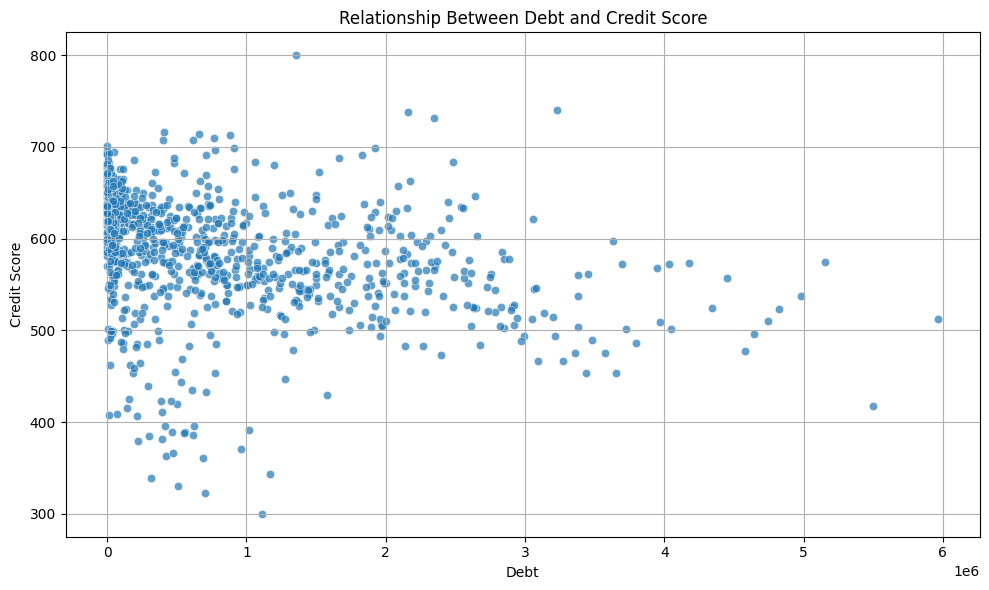

In [38]:
# Choosing only required columns
df_credit_score = data2[["DEBT", "CREDIT_SCORE"]]

# Drop missing values
df_credit_score.dropna(inplace=True)

# Analyzing correlations
correlation = df_credit_score["DEBT"].corr(df_credit_score["CREDIT_SCORE"])
print(f"Correlation Between Debt and Credit Score: {correlation:.2f}")

# Visualizing the data
plt.figure(figsize = (10, 6))
sns.scatterplot(x="DEBT", y="CREDIT_SCORE", data= df_credit_score, alpha=0.7)
plt.title("Relationship Between Debt and Credit Score")
plt.xlabel("Debt")
plt.ylabel("Credit Score")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Inference from the result
- The correlation is <font color="red">**-0.33**</font> showing a negative relation between Debt and Credit Score.
- Therefore they are inversely related to each other.
- Increase in Debt will result in lower Credit Score and the opposite is also true.
- The scatter plot also supports this conclusion.

# Predicting Credit Score with Decision Tree Regressor

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score


In [46]:
# Features
X  = data2[["INCOME","SAVINGS", "DEBT", "CAT_CREDIT_CARD", "DEFAULT"]]

# Target
y = data2["CREDIT_SCORE"]


# Splitting the data
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

# Model intiation
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)


# Function to get user input
def predict_credit_score(income, savings, debt, cat_credit_card, default):
  input_data = pd.DataFrame({
      'INCOME':[income],
      'SAVINGS': [savings],
      'DEBT': [debt],
      'CAT_CREDIT_CARD': [cat_credit_card],
      'DEFAULT': [default]
  })

  credit_score_prediction = dt_model.predict(input_data)
  return credit_score_prediction[0]

income = float(input("Enter customer's income:"))
savings = float(input("Enter customer's savings:"))
debt = float(input("Enter customer's debt:"))
cat_credit_card = int(input("Enter 1 if customer has credit card, 0 otherwise:"))
default = int(input("Enter 1 if customer has defaulted, 0 otherwise:" ))

predicted_credit_score = predict_credit_score(income, savings, debt, cat_credit_card, default)

print(f"Predicted Credit Score: {predicted_credit_score:.2f}")

Enter customer's income:57000
Enter customer's savings:260000
Enter customer's debt:89000
Enter 1 if customer has credit card, 0 otherwise:1
Enter 1 if customer has defaulted, 0 otherwise:0
Predicted Credit Score: 601.00


# Deploying The Models In Gradio

In [8]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.3 MB/s eta 0:00:00


In [9]:
import gradio as gr

In [10]:
# Function to launch gradio

def gradio_predict_loan_default(age, income, emp_length, loan_int_rate, loan_amnt, home_ownership, loan_intent, default_history):
  loan_percent_income = loan_amnt/income
  input_data = {
      "person_age": [age],
      "person_income": [income],
      "person_emp_length": [emp_length],
      "loan_int_rate": [loan_int_rate]
  }

  for category, value in zip(["person_home_ownership", "loan_intent", "cb_person_default_on_file"], [home_ownership, loan_intent, default_history]):
    for val in categories[category]:
      input_data[f"{category}_{val}"] = [1 if value == val else 0]

  input_data = pd.DataFrame(input_data)

  for col in all_columns:
    if col not in input_data.columns:
      input_data[col] = 0
  input_data = input_data[all_columns]

  prediction = random_forest_classifier.predict(input_data)[0]

  if prediction == 1:
    return "\nBased on the information provided, the applicant is predicted to be more likely to default on the loan"
  else:
    return "\nBased on the information provided, the applicant is predicted to be less likely to default on the loan"

inputs = [
    gr.Number(label="Applicant's age"),
    gr.Number(label="Applicant's income"),
    gr.Number(label="Applicant's employment duration in years"),
    gr.Number(label="Loan interest rate"),
    gr.Number(label="Loan amount requested"),
    gr.Dropdown(choices=["RENT", "MORTGAGE", "OWN","OTHER"], label="Home ownership status"),
    gr.Dropdown(choices=["DEBTCONSOLIDATION", "EDUCATION", "HOMEIMPROVEMENT", "MEDICAL", "PERSONAL", "VENTURE"], label="Loan Intent"),
    gr.Dropdown(choices=['Y', 'N'], label="Has the applicant defaulted before?")
]


outputs = gr.Textbox()

# Launch gradio interface
gr.Interface(fn=gradio_predict_loan_default, inputs=inputs, outputs=outputs, title="Credit Risk Assesment Model").launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4604fd8cca092dfeec.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Evaluating Precision Recall and Cross Validation

In [24]:
# Model evaluation function

def eval_model(model, X_train, y_train, X_test, y_test):
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy:.2f}")
  print("\nClassification Report:")
  #print(classification_report(y_test, y_pred))


  # Convert to pandas DataFrame
  report_dict = classification_report(y_test, y_pred, output_dict=True) # Get the classification report as a dictionary
  report_df = pd.DataFrame(report_dict).transpose() # Create the dataframe from the dictionary

  # Format DataFrame for better display
  report_df = report_df.round(2)  # Round to 2 decimal places

  # Convert to HTML table with custom styling using Styler
  styled_df = report_df.style.set_table_styles([
      {'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('padding', '5px'), ('text-align', 'center')]},
      {'selector': 'td', 'props': [('padding', '5px'), ('border', '1px solid black'), ('text-align', 'center')]}
  ])

  # Display styled HTML in Jupyter Notebook
  display(HTML(styled_df.to_html()))  # Use Styler's to_html()

  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  print(f"Precision:{precision:.2f}")
  print(f"Recall: {recall:.2f}")

  cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
  print(f"\nCross Validation Accuracy: {cv_scores.mean():.2f} (=/- {cv_scores.std()*2:.2f})")


eval_model(random_forest_classifier, X_train, y_train, X_test, y_test)


Accuracy: 0.85

Classification Report:


,precision,recall,f1-score,support
0,0.870000,0.950000,0.910000,5072.000000
1,0.750000,0.510000,0.610000,1445.000000
accuracy,0.850000,0.850000,0.850000,0.850000
macro avg,0.810000,0.730000,0.760000,6517.000000
weighted avg,0.850000,0.850000,0.840000,6517.000000


Precision:0.75
Recall: 0.51

Cross Validation Accuracy: 0.85 (=/- 0.01)
